In [ ]:
'''
1. データセットの読み込みと前処理
'''
# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (28,28)の画像データを(784)のベクトルに変換して正規化を行う 
# (60000, 28, 28)の訓練データを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(-1, 784)
# 訓練データをfloat32(浮動小数点数)型に、255で割ってスケール変換する
x_train = x_train.astype('float32') / 255

# (10000, 28, 28)のテストデータを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(-1, 784)
# テストデータをfloat32(浮動小数点数)型に、255で割ってスケール変換する
x_test = x_test.astype('float32') / 255

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
'''
2. モデルの定義
'''
# ニューラルネットワークの構築
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDense、Dropoutをインポート
from tensorflow.keras.layers import Dense, Dropout
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

# 隠れ層
model = Sequential()                # Sequentialオブジェクトの生成
model.add(Dense(256,                # 隠れ層のニューロン数は256
                input_dim=784,      # 入力層のデータサイズは784
                activation='relu')) # 活性化はReLU              
# ドロップアウト
model.add(Dropout(0.5))

model.add(Dense(10,                    # 出力層のニューロン数は10
                activation='softmax')) # 活性化はソフトマックス関数 
               

# モデルのコンパイル
learning_rate = 0.1                  # 学習率
model.compile(                       # オブジェクトのコンパイル
    loss='sparse_categorical_crossentropy', # スパース行列対応クロスエントロピー誤差
    optimizer=SGD(lr=learning_rate), # オプティマイザーはSGD
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

model.summary() # ニューラルネットワークのサマリ（概要）を出力

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
'''
3.学習を行う
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数、ミニバッチのサイズを設定
training_epochs = 100 # 学習回数
batch_size = 64       # ミニバッチのサイズ

# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss', # 監視対象は損失
    patience=5,         # 監視する回数
    verbose=1           # 早期終了をログとして出力
)

# 学習を行って結果を出力
history = model.fit(
    x_train,           # 訓練データ
    y_train,           # 正解ラベル
    epochs=training_epochs, # 学習を繰り返す回数
    batch_size=batch_size,  # ミニバッチのサイズ
    verbose=1,              # 学習の進捗状況を出力する
    validation_split= 0.2,  # 検証データとして使用する割合
    shuffle=True, # 検証データを抽出する際にシャッフルする
    callbacks=[early_stopping]# コールバックはリストで指定する
    )
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの誤り率を出力
print('Test loss:', score[0])
# テストデータの正解率を出力
print('Test accuracy:', score[1])

Epoch 1/100
750/750 [==============================] - 4s 3ms/step - loss: 0.8676 - accuracy: 0.6957 - val_loss: 0.4811 - val_accuracy: 0.8259
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5118 - accuracy: 0.8197 - val_loss: 0.4168 - val_accuracy: 0.8464
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4542 - accuracy: 0.8340 - val_loss: 0.4113 - val_accuracy: 0.8478
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4331 - accuracy: 0.8415 - val_loss: 0.3754 - val_accuracy: 0.8643
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4085 - accuracy: 0.8523 - val_loss: 0.3812 - val_accuracy: 0.8610
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3929 - accuracy: 0.8595 - val_loss: 0.3587 - val_accuracy: 0.8726
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3834 - accuracy: 0.8627 - val_loss: 0.3669 - val_accuracy: 0.8657

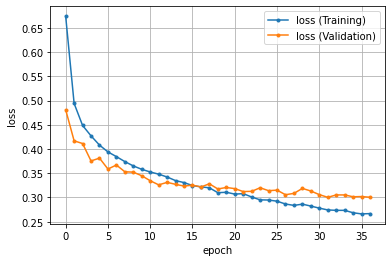

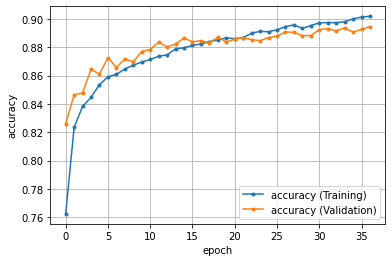

In [ ]:
'''
4. 損失、正解率をグラフにする
'''
%matplotlib inline
import matplotlib.pyplot as plt

# 訓練データの損失をプロット
plt.plot(history.history['loss'],
         marker='.',
         label='loss (Training)')
# 検証データの損失をプロット
plt.plot(history.history['val_loss'],
         marker='.',
         label='loss (Validation)')
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの精度をプロット
plt.plot(history.history['accuracy'],
         marker='.',
         label='accuracy (Training)')
# 検証データの精度をプロット
plt.plot(history.history['val_accuracy'],
         marker='.',
         label='accuracy (Validation)')
plt.legend(loc='best') # 凡例を表示
plt.grid()             # グリッド表示
plt.xlabel('epoch')    # x軸ラベル
plt.ylabel('accuracy') # y軸ラベル
plt.show()